In [1]:
# Reference: https://www.kaggle.com/naveenc131/cnn-with-accuracy-of-98

import keras 
import tensorflow as tf

import numpy as np 
import pandas as pd

import cv2
import os

Using TensorFlow backend.


In [2]:
# Import Training Set

data_trial = "/Users/vineevineela/Downloads/Consumer_To_Shop/Semi_train"
IMG_SIZE = 64
NO_OF_CATEGORIES = 5
train_image = []
train_label = []


#enters folders (dress,shirt,pants) in train
for folder in os.listdir(data_trial):
    lab = folder
    if('.DS_Store' not in folder):
        
        #sub_folder is train/dress
        sub_folder = os.path.join(data_trial,folder)
        if('.DS_Store' not in sub_folder):
             for img in os.listdir(sub_folder):
                    path = os.path.join(sub_folder,img)
                    if('.DS_Store' not in path):
                        img = cv2.imread(path,cv2.IMREAD_COLOR)
                        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
                        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
                        train_image.append(img)
                        train_label.append(lab)
                        
train_image = np.array(train_image)
train_label = np.array(train_label)

In [3]:
type(train_image)

numpy.ndarray

In [4]:
#train_image = train_image[:100000]

In [5]:
# Total 5954 images with shape 64x64x3 
train_image.shape

(5954, 64, 64, 3)

In [6]:
# Total 5954 labels
#train_label = train_label[:100000]
train_label.shape

(5954,)

In [7]:
train_label

array(['Skirt', 'Skirt', 'Skirt', ..., 'Chiffon', 'Chiffon', 'Chiffon'],
      dtype='<U12')

In [8]:
label_to_id = {v:k for k,v in enumerate(np.unique(train_label)) }
id_to_label = {v:k for k,v in label_to_id.items() }

print(id_to_label)

{0: 'Chiffon', 1: 'Jeans', 2: 'Lace_Dress', 3: "Men's_Shirts", 4: 'Skirt'}


In [9]:
train_label_id = np.array([label_to_id[i] for i in train_label])
print(train_label_id)

[4 4 4 ... 0 0 0]


In [10]:
# Import Test Set

data_trial = "/Users/vineevineela/Downloads/Consumer_To_Shop/Semi_test"
IMG_SIZE = 64
test_image = []
test_label = []

#enters folders (dress,shirt,pants) in train
for folder in os.listdir(data_trial):
    lab = folder
    if('.DS_Store' not in folder):
        
        #sub_folder is train/dress
        sub_folder = os.path.join(data_trial,folder)
        if('.DS_Store' not in sub_folder):
             for img in os.listdir(sub_folder):
                    path = os.path.join(sub_folder,img)
                    if('.DS_Store' not in path):
                        img = cv2.imread(path,cv2.IMREAD_COLOR)
                        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
                        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
                        test_image.append(img)
                        test_label.append(lab)
                        
test_image = np.array(test_image)
test_label = np.array(test_label)

In [11]:
test_image.shape

(1671, 64, 64, 3)

In [12]:
test_label.shape

(1671,)

In [13]:
test_label

array(['Skirt', 'Skirt', 'Skirt', ..., 'Chiffon', 'Chiffon', 'Chiffon'],
      dtype='<U12')

In [17]:
test_label_id = np.array([label_to_id[i] for i in test_label])

In [18]:
X_train,X_test = train_image,test_image
Y_train,Y_test = train_label_id,test_label_id

In [19]:
#Normalizing
X_train = X_train/255
X_test = X_test/255

(64, 64, 3)


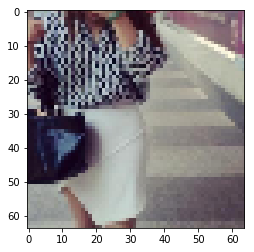

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

print(X_train[1].shape)
plt.imshow(X_train[6])
plt.show()

In [25]:
#One Hot Encode the Output
#change the value to number of categories

Y_train = keras.utils.to_categorical(Y_train, NO_OF_CATEGORIES)
Y_test = keras.utils.to_categorical(Y_test, NO_OF_CATEGORIES)

In [26]:
#5954 rows with 5 columns
Y_train.shape

(5954, 5)

In [22]:
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,Activation,BatchNormalization
from keras.optimizers import Adamax
from keras.layers.advanced_activations import LeakyReLU
from keras import backend as K

In [23]:
model = Sequential()


#keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid')
#when u use first time u should add input shape : 64x64 RGB images

#keras.layers.LeakyReLU(alpha=0.3)

#Batch Normalization: Normalize the activations of the previous layer at each batch, i.e. applies 
#a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.

#keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)

model.add(Conv2D(16,(3,3),input_shape=(64,64,3),padding='same'))
model.add(LeakyReLU(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding='same'))
model.add(LeakyReLU(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(32,(3,3),padding='same'))
model.add(LeakyReLU(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(LeakyReLU(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

#Flattens the input. Does not affect the batch size
model.add(Flatten())
model.add(Dense(256,activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(NO_OF_CATEGORIES))
model.add(Activation("softmax"))

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 64, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
__________

In [25]:
#change batch size
model.compile(loss='categorical_crossentropy',
             optimizer = Adamax(),
             metrics=['accuracy'])

model.fit(X_train,
          Y_train,
          batch_size=400,
          epochs=5,
          verbose=1,
         )

Epoch 1/5
5954/5954 [==============================] - 358s 60ms/step - loss: 3.9310 - acc: 0.3881
Epoch 2/5
5954/5954 [==============================] - 342s 57ms/step - loss: 1.9275 - acc: 0.4429
Epoch 3/5
5954/5954 [==============================] - 352s 59ms/step - loss: 1.4783 - acc: 0.4672
Epoch 4/5
5954/5954 [==============================] - 367s 62ms/step - loss: 1.3066 - acc: 0.4988
Epoch 5/5
5954/5954 [==============================] - 362s 61ms/step - loss: 1.2317 - acc: 0.5171


In [26]:
# evaluate the model
#scores = model.evaluate(X_train, Y_train, verbose=0)
#print('Train loss:', score[0])
#print('Train accuracy:', score[1])

In [33]:
#Reference: https://machinelearningmastery.com/save-load-keras-deep-learning-models/

from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()
with open("/Users/vineevineela/Downloads/Consumer_To_Shop/Model/model_cnn_semi.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("/Users/vineevineela/Downloads/Consumer_To_Shop/Model/model.h5")
print("Saved model to disk")

Saved model to disk


In [21]:
# load json and create model

from keras.models import model_from_json

json_file = open('/Users/vineevineela/Downloads/Consumer_To_Shop/Model/model_cnn_semi.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("/Users/vineevineela/Downloads/Consumer_To_Shop/Model/model.h5")
print("Loaded model from disk")

Loaded model from disk


In [27]:
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.37081275269487246
Test accuracy: 0.830041902497598


In [28]:
Y_pred = loaded_model.predict_classes(X_test)
Y_pred

array([4, 4, 0, ..., 0, 0, 3])

In [29]:
Y_pred_list = Y_pred.tolist()
Y_pred_class = []

for i in Y_pred_list:
    Y_pred_class.append(id_to_label[i])
        
#Y_pred_class  

In [30]:
from sklearn.metrics import classification_report

print(classification_report(test_label, Y_pred_class))

              precision    recall  f1-score   support

     Chiffon       0.57      0.55      0.56       542
       Jeans       0.57      0.55      0.56       231
  Lace_Dress       0.00      0.00      0.00        28
Men's_Shirts       0.42      0.35      0.38       241
       Skirt       0.55      0.63      0.59       629

   micro avg       0.54      0.54      0.54      1671
   macro avg       0.42      0.42      0.42      1671
weighted avg       0.53      0.54      0.54      1671



/Users/vineevineela/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
